In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import datetime

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util

survey_params = util.hydra_to_dict(config.survey)

In [13]:
files = sorted(glob(os.path.join('/nfsdata1/bwedig/mejiro/pipeline_dev/debug', '*_total.npy')))
arrays = [np.load(f) for f in files]

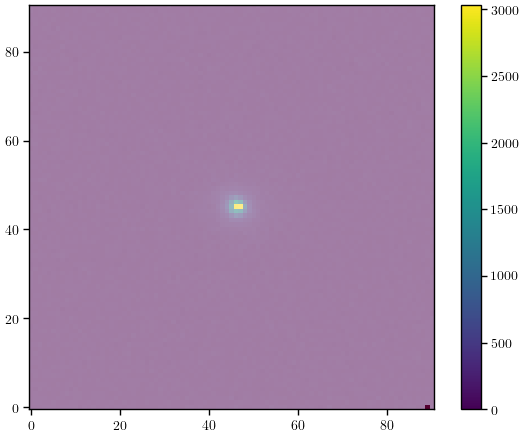

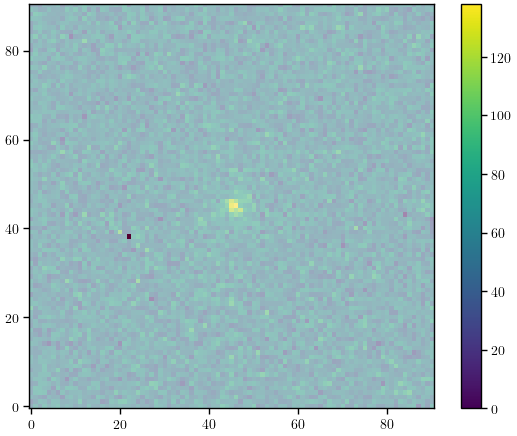

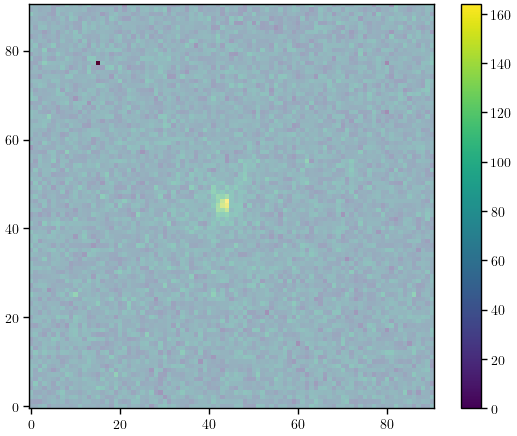

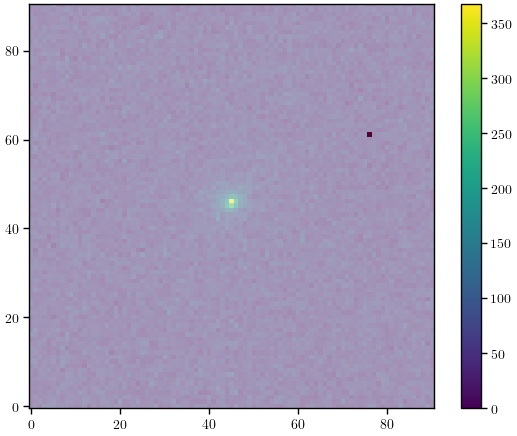

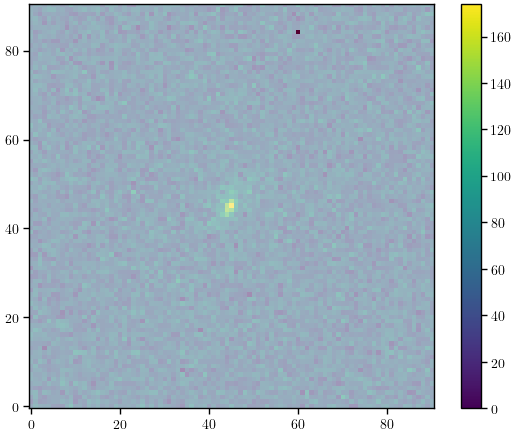

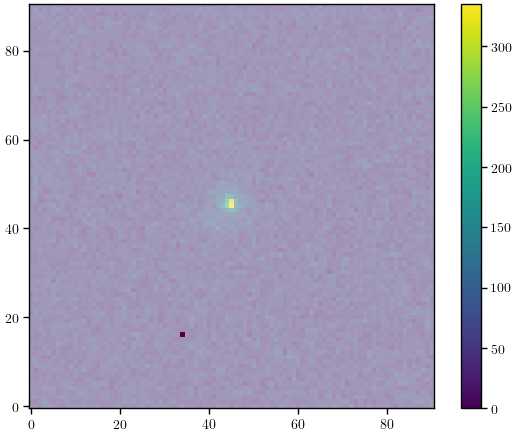

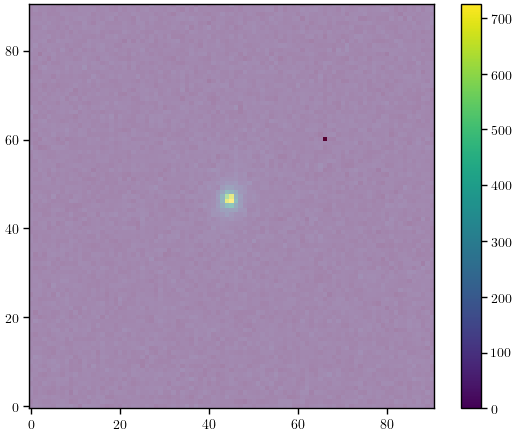

In [4]:
for a in arrays:
    mask = a <= 0  # Create a mask for pixels with value <= 0
    plt.imshow(a, cmap='viridis')
    plt.colorbar()
    plt.imshow(mask, cmap='Reds', alpha=0.5)  # Overlay the mask in red
    plt.show()